# Homework I

## II. Programming [9v]

To answer the following questions, consider using the _sklearn_ API documentation and the notebooks in the course webpage as guidance. Show in your PDF report both the code and the corresponding results.

Consider the _column_diagnosis.arff_ data available at the homework tab, comprising 6 biomechanical features to classify 310 orthopaedic patients into 3 classes (_normal_, _disk hernia_, _spondilolysthesis_).

1) [1.5v] Apply _f_classif_ from _sklearn_ to assess the discriminative power of the input variables.  \
Identify the input variable with the highest and lowest discriminative power.  \
Plot the class-conditional probability density functions of these two input variables.

Input Variable with Highest Discriminative Power:
                    Feature     F-Score
5  degree_spondylolisthesis  119.122881

Input Variable with Lowest Discriminative Power:
         Feature    F-Score
4  pelvic_radius  16.866935

High discriminative plot:


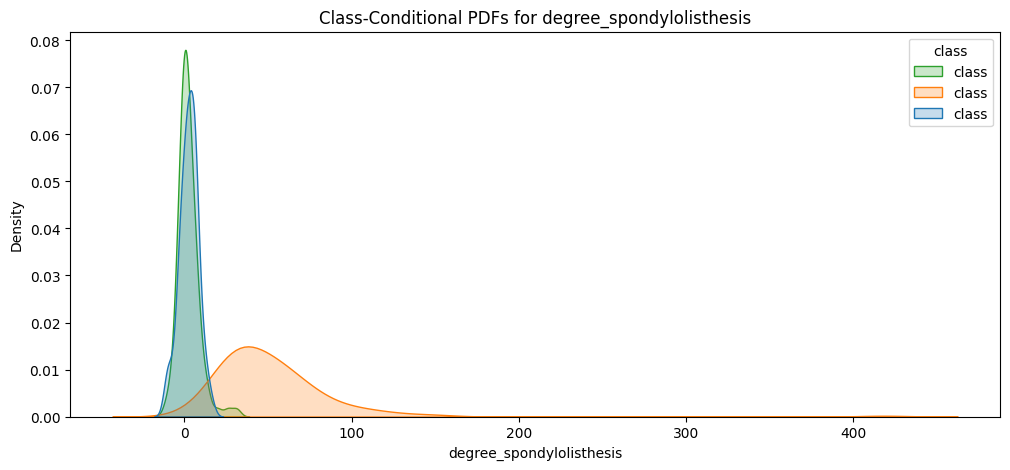


Low discriminative plot:


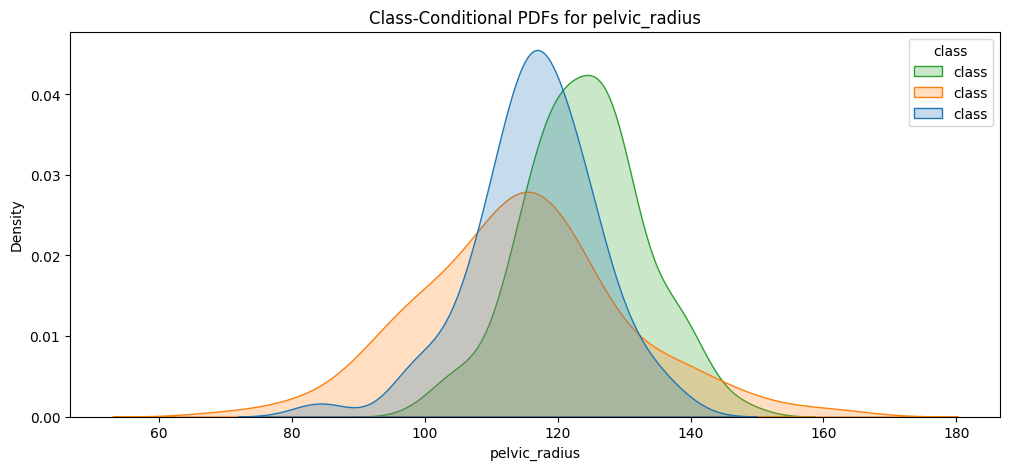

In [4]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import f_classif 
from scipy.io import arff 

data, meta = arff.loadarff("column_diagnosis.arff") 
df = pd.DataFrame(data) 

target_variable = 'class' 
X = df.drop(columns=[target_variable]) 
y = df[target_variable] 

f_scores, _ = f_classif(X, y) 

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores}) 
feature_scores_df = feature_scores_df.sort_values(by='F-Score', ascending=False) 

highest_discriminative_var = feature_scores_df.iloc[0]['Feature'] 
print(f"Input Variable with Highest Discriminative Power:\n{feature_scores_df.head(1)}") 

lowest_discriminative_var = feature_scores_df.iloc[-1]['Feature'] 
print(f"\nInput Variable with Lowest Discriminative Power:\n{feature_scores_df.tail(1)}") 

print("\nHigh discriminative plot:")
plt.figure(figsize=(12, 5)) 
sns.kdeplot(data=df, x=highest_discriminative_var, hue=target_variable, common_norm=False, fill=True, label=target_variable) 
plt.title(f'Class-Conditional PDFs for {highest_discriminative_var}') 
plt.xlabel(highest_discriminative_var) 
plt.ylabel('Density') 
plt.legend(title=target_variable) 
plt.show() 

print("\nLow discriminative plot:") 
plt.figure(figsize=(12, 5)) 
sns.kdeplot(data=df, x=lowest_discriminative_var, hue=target_variable, common_norm=False, fill=True, label=target_variable) 
plt.title(f'Class-Conditional PDFs for {lowest_discriminative_var}') 
plt.xlabel(lowest_discriminative_var) 
plt.ylabel('Density') 
plt.legend(title=target_variable) 
plt.show()


2) [4v] Using a stratified 70-30 training-testing split with a fixed seed (_random_state=0_), assess in a single plot both the training and testing accuracies of a decision tree with depth limits in {1,2,3,4,5,6,8,10} and the remaining parameters as default.  \
[_optional_] Note that split thresholding of numeric variables in decision trees is non-deterministic in _sklearn_, hence you may opt to average the results using 10 runs per parameterization.

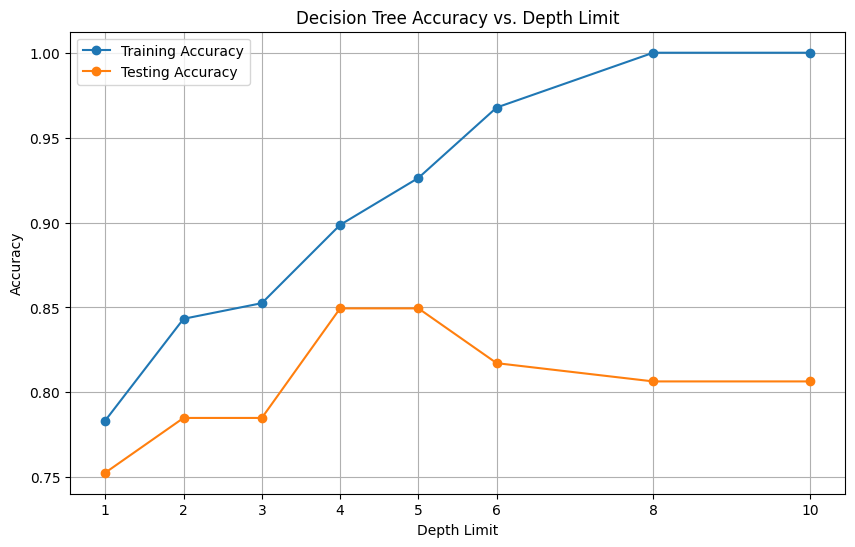

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.io import arff
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the ARFF dataset
data, meta = arff.loadarff("column_diagnosis.arff")

# Convert the ARFF data to a Pandas DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Assuming the target column is named 'class', you may need to adjust this
X = df.drop(columns=['class']).values
y = df['class']

# Encode the class labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the depth limits to test
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

# Initialize arrays to store results
train_accuracies = []
test_accuracies = []

# Set a fixed seed for reproducibility
seed = 0

# Number of runs for each parameterization
num_runs = 10

for depth_limit in depth_limits:
    train_acc = 0
    test_acc = 0
    for _ in range(num_runs):
        # Split the data into training and testing sets with a fixed seed
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)
        
        # Create and fit the decision tree classifier
        clf = DecisionTreeClassifier(max_depth=depth_limit, random_state=seed)
        clf.fit(X_train, y_train)
        
        # Calculate training and testing accuracies
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        
        train_acc += accuracy_score(y_train, train_pred)
        test_acc += accuracy_score(y_test, test_pred)
    
    # Average the results over runs
    train_avg_acc = train_acc / num_runs
    test_avg_acc = test_acc / num_runs
    
    train_accuracies.append(train_avg_acc)
    test_accuracies.append(test_avg_acc)

# Create a single plot to visualize the results
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Accuracy vs. Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.xticks(depth_limits)
plt.legend()
plt.grid(True)
plt.show()

3) [1.5v] Comment on the results, including the generalization capacity across settings.

&nbsp;&nbsp;Analisando a training accuracy, representada em azul, podemos ver que ela aumenta à medida que o limite de profundidade da árvore aumenta, o que nos mostra que esta árvore de decisão tem uma boa performance nos treinos pelos quais foi submetida. A testing accuracy, por sua vez, também aumenta à medida que o limite de profundidade aumenta, o que nos mostra que o modelo generaliza melhor mesmo com o aumento da complexidade do modelo. Porém, por volta do limite de profundidade 4, a testing accuracy fica constante, até começando a diminuir no limite de profundidade 5. Esta descida na testing accuracy sugere que estamos com um problema de overfitting. O modelo tem um bom desempenho nos treinos, porém não consegue transitar essa boa performance para dados não vistos, acabando por reduzir a testing accuracy. Por último, temos a escolha de profunidade ótima. Tal como o nome indica, este parâmetro designa o pico de precisão de teste (que por observação do gráfico se encontra em torno do limite de profundidade 3 e 4) e a capacidade de generalização óptima do modelo. Se ultrapassarmos este ponto ideal, o modelo torna-se demasiado complexo e ocorre overfitting, o que resulta numa diminuição da precisão do teste.</span>

4) [2v] To deploy the predictor, a healthcare team opted to learn a single decision tree (_random_state=0_) using all available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.

i. Plot the decision tree.

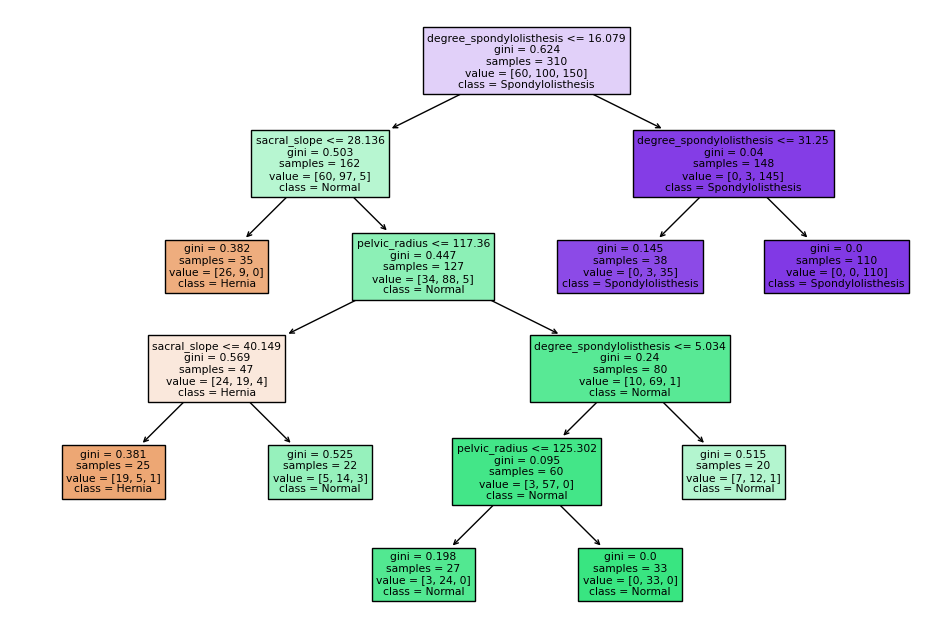

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff

# Load the ARFF file
data = arff.loadarff('column_diagnosis.arff')

# Create a pandas DataFrame
df = pd.DataFrame(data[0])

# Convert 'class' column to string
df['class'] = df['class'].str.decode('utf-8')

# Encode the 'class' column to numeric labels
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Define features (X) and target (y)
X = df.drop(columns='class')
y = df['class']

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=le.classes_)

plt.show()

ii. Characterize a hernia condition by identifying the hernia-conditional associations.

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the ARFF file
from scipy.io import arff

data = arff.loadarff('column_diagnosis.arff')

# Create a pandas DataFrame
df = pd.DataFrame(data[0])

# Check unique classes in the 'class' column
unique_classes = df['class'].unique()
print("Unique Classes:", unique_classes)

# Encode the 'class' column to numeric labels
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Define features (X) and target (y)
X = df.drop(columns=['class'])  # Exclude 'class' column
y = df['class']  # Target variable (encoded)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
clf.fit(X, y)

# Characterize hernia-conditional associations
feature_importances = clf.feature_importances_

# Create a DataFrame to store associations
associations_df = pd.DataFrame({'Feature': X.columns, 'Association Importance': feature_importances})

# Sort the associations by importance (highest to lowest)
associations_df = associations_df.sort_values(by='Association Importance', ascending=False)

# Print the sorted associations
print("Hernia-Conditional Associations (Feature Importance):")
print(associations_df)

Unique Classes: [b'Hernia' b'Spondylolisthesis' b'Normal']
Hernia-Conditional Associations (Feature Importance):
                    Feature  Association Importance
5  degree_spondylolisthesis                0.795233
3              sacral_slope                0.123995
4             pelvic_radius                0.080772
0          pelvic_incidence                0.000000
1               pelvic_tilt                0.000000
2     lumbar_lordosis_angle                0.000000
